In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#analyse de données publicitaires

In [0]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable


In [0]:
path = "/content/drive/My Drive/Tech-Test-sublime/dataset-fake-technical-test.csv"

In [4]:
DF = pd.read_csv(path,sep='\t')
DF.head()

,ts,event,useragent,url,region,departement,city,zone_id,ad_id,tag_id
0,2019-07-19 14:02:46,i0,Mozilla/5.0 (Windows NT 6.1; Win64; x64; rv:52...,https://www.leboncoin.fr/recherche/?text=lit%2...,Centre,Loiret,Orléans,9287,24059030,p5498120607220765000
1,2019-07-19 14:00:24,i0,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,http://www.meteofrance.com/previsions-meteo-fr...,NaN,NaN,NaN,17437,24148608,p2884347951303540000
2,2019-07-19 14:08:48,i0,Mozilla/5.0 (Windows NT 6.1; Win64; x64) Apple...,https://www.leboncoin.fr/recherche/?category=2...,Occitanie,Hérault,Montpellier,9287,24167308,p1686686056029719600
3,2019-07-19 14:08:57,i0,Mozilla/5.0 (Windows NT 6.1; Win64; x64) Apple...,https://www.leboncoin.fr/recherche/?text=salle...,Île-de-France,Yvelines,Villepreux,9287,24167308,p4519346950664111600
4,2019-07-19 14:09:39,i0,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,https://www.leboncoin.fr/recherche/?text=machi...,Grand-Est,Bas-Rhin,Strasbourg,9287,24167308,p670021366504534300


#Partie 1 :ANALYSE DESCRIPTIVE DU DATASET

In [5]:
DF.count()

ts             303386
event          303386
useragent      303386
url            302964
region         259202
departement    258286
city           258286
zone_id        303386
ad_id          303386
tag_id         303386
dtype: int64


### Description du dataset

> Le dataset comporte **303386** ligne

> Il comprend 10 variables 

>> TS "timestamps" 

>> event correspand a l'evenement (impression ou click )

>> useragent 

>> url 

>> 3 varible de localisation geographique ( region, departement, city )

>> zone_id zone sur le site ( support de pub )

>> ad_id identifiant de la pub

>> tag_id 


**Toutes les variables sont qualitatives**

### Valeurs manquantes

Les variables  url , region, departement, city ont des valeurs manquantes

### Calcule des frequences de chaque variable


Pour la variable event :

In [6]:
DF['event'].value_counts()

i0    296737
c       6649
Name: event, dtype: int64

On dispose de 296737 impression
et 6649 click

In [7]:
(DF['event'].value_counts()[0]/DF['event'].count())*100

97.80840249714885

In [8]:
(DF['event'].value_counts()[1]/DF['event'].count())*100

2.1915975028511534

Ce qui fait que ***97.8 %*** des ***event*** sond des impressions et ***2.2 %*** sont des clicks

In [0]:
zone_id = np.unique(DF["zone_id"].tolist())
departement = np.unique(DF["departement"].tolist())

Par rapport au regions :

In [10]:
DF["region"].value_counts()

Île-de-France                 43690
Auvergne-Rhone-Alpes          34505
Nouvelle-Aquitaine            26856
Occitanie                     24165
Hauts-de-France               20085
Provence-Alpes-Côte d'Azur    19694
Grand-Est                     19313
Pays de la Loire              16966
Brittany                      15428
Normandy                      13645
Centre                        12555
Bourgogne-Franche-Comte       10947
Aquitaine                       671
Corsica                         491
Languedoc-Roussillon             70
Champagne-Ardenne                51
Poitou-Charentes                 44
Lower Normandy                   10
Lorraine                          4
Rhône-Alpes                       4
Haute-Normandie                   3
Nord-Pas-de-Calais                2
Auvergne                          2
Picardie                          1
Name: region, dtype: int64

La region la plus frequente est la region **d'Île-de-France**  suivie de **Auvergne-Rhone-Alpes** **Nouvelle-Aquitaine** ,**Occitanie**

Les regions les moins frequentes sont                                       

Aquitaine                     
Corsica                      
Languedoc-Roussillon             
Champagne-Ardenne                
Poitou-Charentes                
Lower Normandy                   
Rhône-Alpes                       
Lorraine                          
Haute-Normandie                   
Nord-Pas-de-Calais                
Auvergne                          
Picardie                          

Par rapport aux annonces (**ad_id**) 

In [11]:
DF["ad_id"].value_counts()

24105229    78423
24105228    77804
24171550    36040
24167308    23900
24148608    16195
24154017    15334
24165898     7846
24133055     6878
24133056     6862
24116387     6857
24133054     6814
24160320     4880
24135582     4064
24158474     3144
24059030     3136
24165990     2596
24148612     2110
24153270      205
24165889      103
24138365       98
24138353       52
24153273       45
Name: ad_id, dtype: int64

On dispose de 22 annonces                                              
les annonces avec les id   **24105229** et **24105228** sont les plus frequentes

# Partie 2 : Analyse du CTR


Dans cette partie on va analyser le CTR par zone et par departement 


> pour commencer on calcule le CTR globale.




In [12]:
DF['event'].value_counts()[1]/DF['event'].value_counts()[0] *100

2.2407047317995397



> Le CTR total est de 2.24 %



## Analyse par ZONE

Afin d'analyser le CTR par Zone_id je vais crée un nouvel dataframe pour enregistrer les **impressions** et les **Ctr** pour chaque zone_id.

In [13]:
CTR_zone = []
impression_zone = []
for z in zone_id:
  CTR = DF[DF["zone_id"] == z]["event"].value_counts()[1]/DF[DF["zone_id"] == z]["event"].value_counts()[0] * 100
  CTR_zone.append(CTR)
  impression_zone.append(DF[DF["zone_id"] == z]["event"].value_counts()[0])
DF_CTRZ = pd.DataFrame({'zone_id':zone_id,'CTR %' : CTR_zone,'impression' : impression_zone}).sort_values(by='CTR %', ascending=False)
DF_CTRZ.head()

,zone_id,CTR %,impression
3,9287,3.163213,60761
1,9283,2.648763,113940
5,17437,1.481435,95313
2,9284,1.259217,8815
4,9614,1.125089,11288


Et Afin de bien visualiser les resultat on va visualiser tout ceci avec un bar chart.

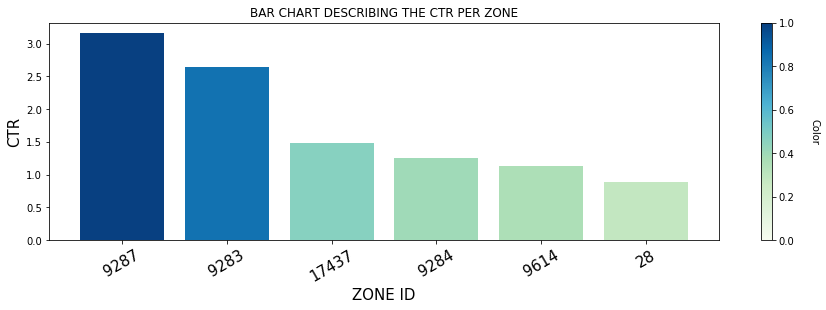

In [14]:

data_x = np.arange(len(DF_CTRZ['zone_id']))
data_hight = CTR_zone
data_color = CTR_zone


data_color = [x / max(DF_CTRZ['CTR %']) for x in DF_CTRZ['CTR %']]
fig, ax = plt.subplots(figsize=(15, 4))

my_cmap = plt.cm.get_cmap('GnBu')
colors = my_cmap(data_color)
rects = ax.bar(data_x, DF_CTRZ['CTR %'], color=colors)

sm = ScalarMappable(cmap=my_cmap, norm=plt.Normalize(0,max(data_color)))
sm.set_array([])

cbar = plt.colorbar(sm)
cbar.set_label('Color', rotation=270,labelpad=25)

plt.xlabel('ZONE ID', fontsize=15)
plt.ylabel('CTR', fontsize=15)
plt.xticks(data_x, DF_CTRZ['zone_id'], fontsize=15, rotation=30)
plt.title('BAR CHART DESCRIBING THE CTR PER ZONE')
plt.show()

 On remarque les zones 9283 et 9287 ont un CTR superieur a 2 %

##Analyse par Departement

On procède au mêmes étapes pour l'analyse par rapport au départements.


In [0]:
CTR_dep = []
for d in departement:
  if len(DF[DF["departement"] == d ]["event"].value_counts()) > 1 :
    CTR = DF[DF["departement"] == d]["event"].value_counts()[1]/DF[DF["departement"] == d]["event"].value_counts()[0] *100
  else :
    CTR = 0
  CTR_dep.append(CTR)
  

In [0]:
imp_dep = []
for d in departement :
  if len(DF[DF["departement"] == d]["event"].value_counts()) > 0 :
    imp = DF[DF["departement"] == d]["event"].value_counts()[0]
  else : imp = 0
  imp_dep.append(imp)
  

In [17]:
DF_ctrd = pd.DataFrame({'departement':departement,'CTR' : CTR_dep,'impression' : imp_dep}).sort_values(by='CTR', ascending=False)
DF_ctrd.head(3)

,departement,CTR,impression
7,Ariège,5.134474,409
14,Cantal,4.273504,234
18,Corrèze,3.785489,317


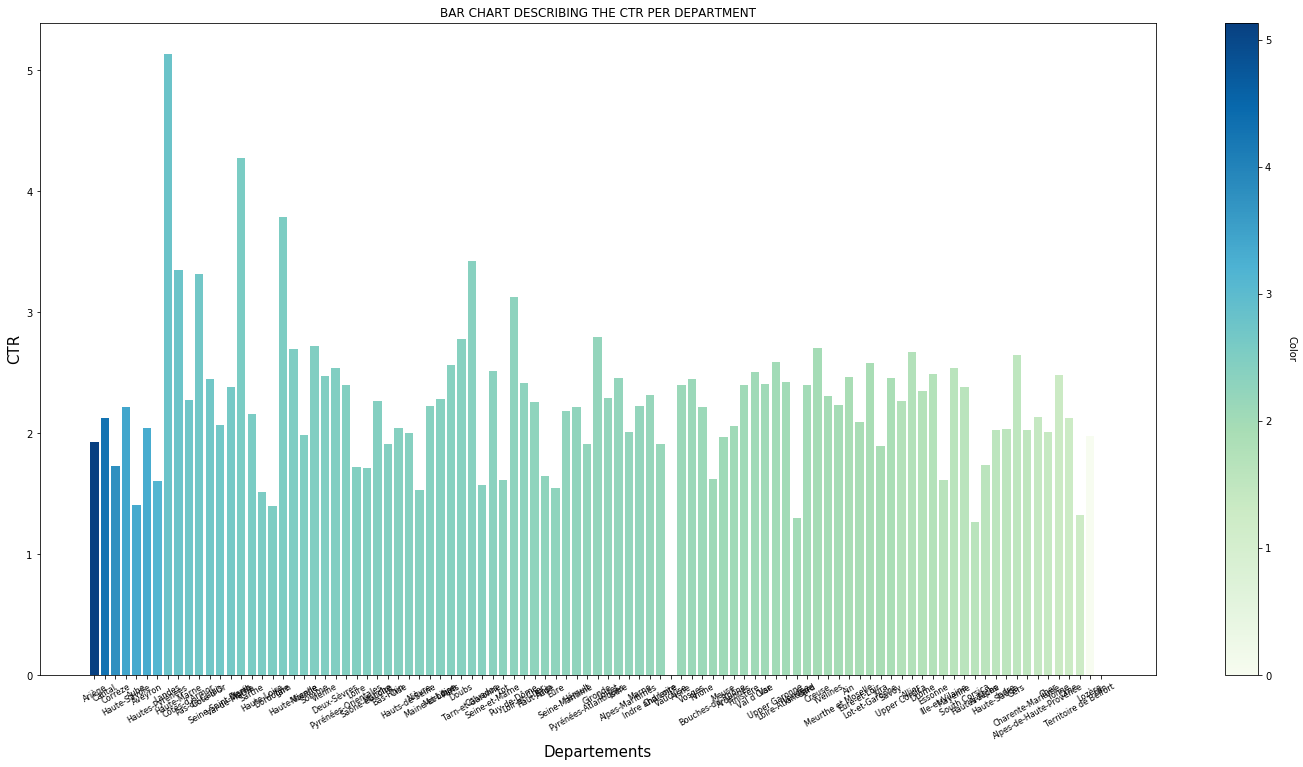

In [18]:

data_x = np.arange(len(departement))
data_hight = CTR_dep
data_color = CTR_dep


data_color = [x / max(data_color) for x in DF_ctrd['CTR']]
fig, ax = plt.subplots(figsize=(25, 12))

my_cmap = plt.cm.get_cmap('GnBu')
colors = my_cmap(data_color)
rects = ax.bar(data_x, data_hight, color=colors)

sm = ScalarMappable(cmap=my_cmap, norm=plt.Normalize(0,max(DF_ctrd['CTR'])))
sm.set_array([])

cbar = plt.colorbar(sm)
cbar.set_label('Color', rotation=270,labelpad=25)

plt.xlabel('Departements', fontsize=15)
plt.ylabel('CTR', fontsize=15)
plt.xticks(data_x, DF_ctrd['departement'], fontsize=8, rotation=30)
plt.title('BAR CHART DESCRIBING THE CTR PER DEPARTMENT')


plt.show()

## Verification d'hypothèse


On analysant les résultats on peut dire par une première observation que le CTR est plus élevé quand il y'a plus d'impression


Afin de verifier la relation entre les impressions et le CTR je vais afficher les donnée du CTR en fonction du nombres d'impressions d'abord par ZONE enssuite par departement.



> Par zone :



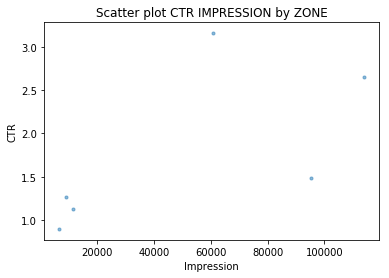

In [19]:
x = impression_zone
y = CTR_zone

area = np.pi*3

# Plot
plt.scatter(x, y, s=area, alpha=0.5)
plt.title('Scatter plot CTR IMPRESSION by ZONE')
plt.xlabel('Impression')
plt.ylabel('CTR')
plt.show()


On calcule le coefficient de correlation R

In [20]:
DF_CTRZ.head(3)

,zone_id,CTR %,impression
3,9287,3.163213,60761
1,9283,2.648763,113940
5,17437,1.481435,95313


In [21]:
DF_CTRZ['CTR %'].corr(DF_CTRZ['impression'])

0.6483291784135937

Pour l'analyse par zone on a un coefficient de correlation de  *R* = **0.65**    ce qui demontre une correlation positive modéré.

> la moyenne du CTR apres une recherche sur internet est de 2 % 

> Les zones produisant un CTR en dessous de la moyenne sont les suivantes :

In [22]:
DF_CTRZ[DF_CTRZ['CTR %'] < 2]

,zone_id,CTR %,impression
5,17437,1.481435,95313
2,9284,1.259217,8815
4,9614,1.125089,11288
0,28,0.891239,6620




> Par departement



In [23]:
DF_ctrd.head(3)

,departement,CTR,impression
7,Ariège,5.134474,409
14,Cantal,4.273504,234
18,Corrèze,3.785489,317


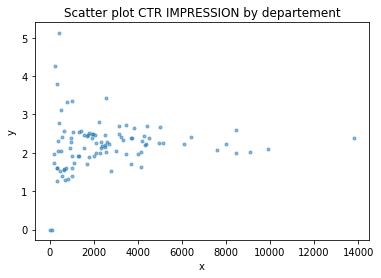

In [24]:
# Create data
x = imp_dep
y = CTR_dep
area = np.pi*3

# Plot
plt.scatter(x, y, s=area,  alpha=0.5)
plt.title('Scatter plot CTR IMPRESSION by departement')
plt.xlabel('x')
plt.ylabel('y')
plt.show()


In [25]:
DF_ctrd['CTR'].corr(DF_ctrd['impression'])

0.07263514226789551

Pour l'analyse par departement on a un coefficient de correlation de R = 0.073 ce qui demontre que l'impression au dela d'un certain niveau n'affecte pas le CTR

Les départements suivants sont en dessou du CTR moyen.

In [26]:
DF_ctrd[DF_ctrd['CTR'] < 2]

,departement,CTR,impression
30,Gard,1.999048,2101
20,Creuse,1.980198,202
95,Yvelines,1.977472,3995
60,Meurthe et Moselle,1.967593,3456
0,Ain,1.924026,2027
28,Eure-et-Loir,1.912777,1307
54,Lot-et-Garonne,1.911469,994
47,Jura,1.906275,1259
75,Savoy,1.892042,1797
85,Upper Corsica,1.734104,173


###Conclusion

On conclue que le CTR et le nombre d'impressions ne sont pas corrélés Afin d'améliorer le CTR il serait plus  judicieux de faire une étude par annonces et trouver les critères qui font que l'annonce soit attractives, et cibler les départements en dessou du CTR moyen. 

Les variables a cibler sont ad_id on pourrait faire une étude par rapport au departements et aussi par rapport au sites < support >.


# PARTIE 3 : Analyse du CTR par site

###Analyse par site

Le support de l'ad est important pour le CTR afin de verifier cet hypothèse on va extraire les noms des sites web des url existant.

In [0]:
from urllib.parse import urlparse

def split(x) :
  if isinstance(x, str) :
    site = x.split(".")
    return site[1]
  else :
    return "Na"

In [0]:
DF["site"] = DF['url'].apply(lambda url : "{uri.netloc}/".format(uri=urlparse(url)) if not pd.isna(url) else np.nan).apply(split)

In [29]:
DF.tail(3)

,ts,event,useragent,url,region,departement,city,zone_id,ad_id,tag_id,site
303383,2019-07-22 13:40:09,i0,Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:6...,http://www.meteofrance.com/previsions-meteo-fr...,NaN,NaN,NaN,17437,24148608,p1589349444484463400,meteofrance
303384,2019-07-22 13:40:09,i0,Mozilla/5.0 (Windows NT 10.0; Win64; x64; Trid...,http://www.meteofrance.com/previsions-meteo-fr...,Île-de-France,Paris,Paris,17437,24148608,p1810092354872119000,meteofrance
303385,2019-07-22 13:40:24,i0,Mozilla/5.0 (Windows NT 6.1; Win64; x64) Apple...,http://www.meteofrance.com/previsions-meteo-fr...,Pays de la Loire,Vendée,Montaigu,17437,24148608,p4616516545598262000,meteofrance


Maintenant que nous disposons des sites on va analyser le CTR par site 

In [30]:
DF['site'].value_counts()

leboncoin            188318
meteofrance           96553
onvasortir            11407
jardiner-malin         6667
Na                      422
nature-and-garden         9
ayads                     8
google                    1
googleusercontent         1
Name: site, dtype: int64

On procede au calcule du CTR par site

In [0]:
sites = np.unique(DF["site"].tolist())


In [0]:
CTR_site = []
imp_site = []
for s in sites :
  
  if len(DF[DF["site"] == s ]["event"].value_counts()) > 1 :
    
    CTR = DF[DF["site"] == s]["event"].value_counts()[1]/DF[DF["site"] == s]["event"].value_counts()[0]
    
  else :
    CTR = 0
  CTR_site.append(CTR)
  imp_site.append(DF[DF["site"] == s]["event"].value_counts()[0])

In [33]:
DF_site = pd.DataFrame({'site' : sites , 'CTR' : CTR_site,'Impression' : imp_site}).sort_values(by='CTR', ascending=False)
DF_site.head(10)

,site,CTR,Impression
1,ayads,0.333333,6
0,Na,0.060302,398
5,leboncoin,0.026178,183514
6,meteofrance,0.013307,95285
8,onvasortir,0.010542,11288
4,jardiner-malin,0.008776,6609
2,google,0.000000,1
3,googleusercontent,0.000000,1
7,nature-and-garden,0.000000,9


On remarque que le CTR est très élevé par rapport au site ayads et aussi pour les valeurs manquantes regroupé sous Na.               


La première impression nous dit que les valeurs de NA et ayads ne sont pas représentatives cependant on va visualiser les résultats tel qu'ils sont.


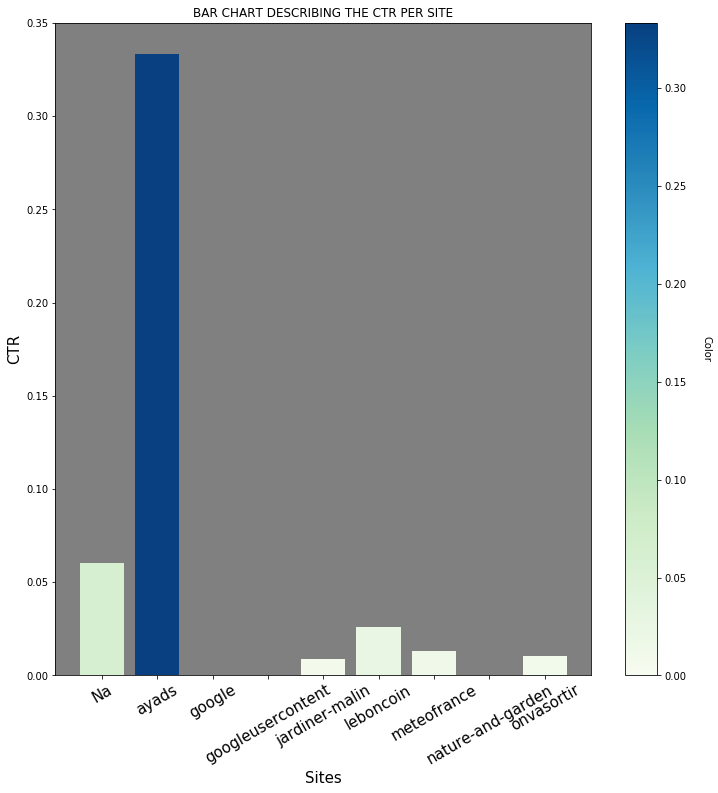

In [34]:
data_x = np.arange(len(sites))
data_hight = CTR_site
data_color = CTR_site

data_color = [x / max(data_color) for x in data_color]
fig, ax = plt.subplots(figsize=(12, 12))

my_cmap = plt.cm.get_cmap('GnBu')
colors = my_cmap(data_color)
rects = ax.bar(data_x, data_hight, color=colors)

sm = ScalarMappable(cmap=my_cmap, norm=plt.Normalize(0,max(data_hight)))
sm.set_array([])

cbar = plt.colorbar(sm)
cbar.set_label('Color', rotation=270,labelpad=25)

ax.set_facecolor("gray")

plt.xlabel('Sites', fontsize=15)
plt.ylabel('CTR', fontsize=15)
plt.xticks(data_x, sites, fontsize=15, rotation=30)
plt.title('BAR CHART DESCRIBING THE CTR PER SITE')


plt.show()

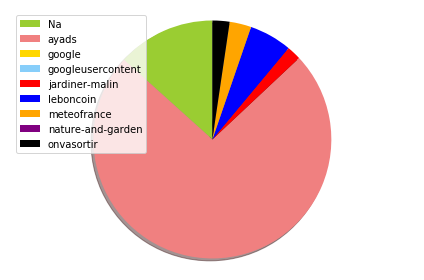

In [35]:

labels = sites
sizes = data_color
colors = ['yellowgreen', 'lightcoral', 'gold', 'lightskyblue','red','blue','orange','purple','black']
patches, texts = plt.pie(sizes, colors=colors, shadow=True, startangle=90)
plt.legend(patches, labels, loc="best")
plt.axis('equal')
plt.tight_layout()
plt.show()

In [36]:

DF_site['CTR'].corr(DF_site['Impression'])

-0.15601333076782528

R = - 0.16

Comme prévu les valeurs atads et Na faussent les résultats                  

pour ayads nous disposons pas d'assez d'impressions pour pouvoir généraliser 

pour Na on rassemble  plusieurs sites et ceci fausse les résultats.

On va considérer NA et Ayads comme outliers 


In [0]:
DF_site=DF_site.drop(DF_site.index[[0,1]])

In [38]:
DF_site.head()

,site,CTR,Impression
5,leboncoin,0.026178,183514
6,meteofrance,0.013307,95285
8,onvasortir,0.010542,11288
4,jardiner-malin,0.008776,6609
2,google,0.000000,1


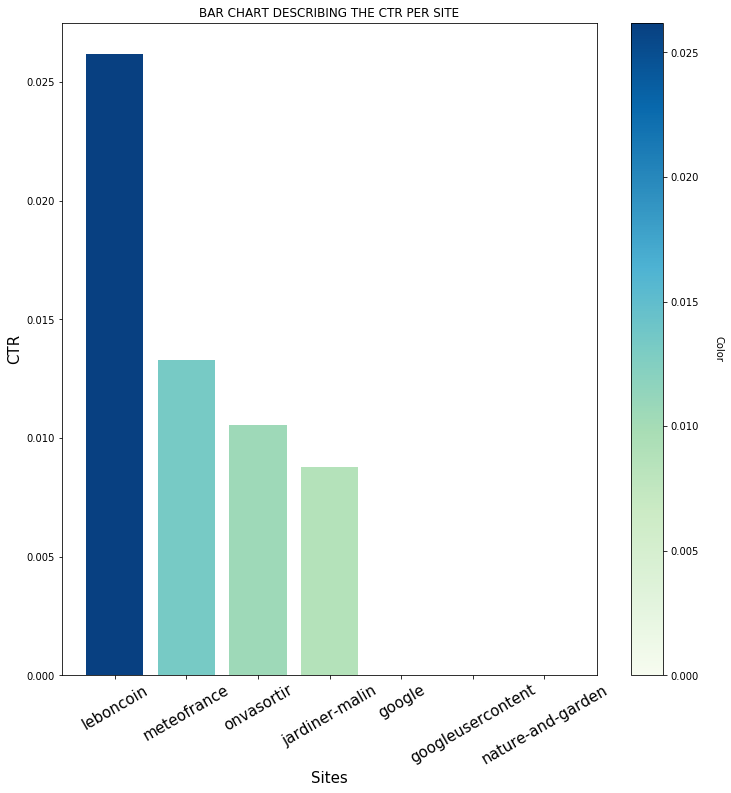

In [39]:


data_x = np.arange(len(DF_site['site']))
data_hight = DF_site['CTR']
data_color = DF_site['CTR']

data_color = [x / max(DF_site['CTR']) for x in DF_site['CTR']]
fig, ax = plt.subplots(figsize=(12, 12))

my_cmap = plt.cm.get_cmap('GnBu')
colors = my_cmap(data_color)
rects = ax.bar(data_x, data_hight, color=colors)

sm = ScalarMappable(cmap=my_cmap, norm=plt.Normalize(0,max(data_hight)))
sm.set_array([])

cbar = plt.colorbar(sm)
cbar.set_label('Color', rotation=270,labelpad=25)


plt.xlabel('Sites', fontsize=15)
plt.ylabel('CTR', fontsize=15)
plt.xticks(data_x, DF_site['site'], fontsize=15, rotation=30)
plt.title('BAR CHART DESCRIBING THE CTR PER SITE')


plt.show()

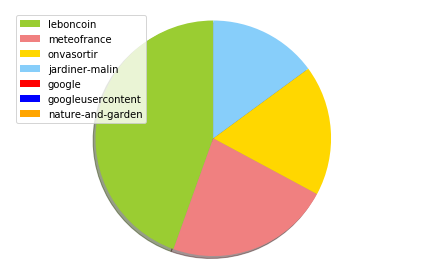

In [40]:

labels = DF_site['site']
sizes = data_color
colors = ['yellowgreen', 'lightcoral', 'gold', 'lightskyblue','red','blue','orange']
patches, texts = plt.pie(sizes, colors=colors, shadow=True, startangle=90)
plt.legend(patches, labels, loc="best")
plt.axis('equal')
plt.tight_layout()
plt.show()

In [41]:
DF_site['CTR'].corr(DF_site['Impression'])

0.9140015910574587

On remarque ici une forte correlation entre CTR et Impressions apres avoir fait l'etude par site.

leboncoin est le site avec le plus grand CTR.

### Analyse du CTR par annonce pour le site Leboncoin

In [42]:
DF2 = DF[DF["site"] == "leboncoin"]
DF2.head()

,ts,event,useragent,url,region,departement,city,zone_id,ad_id,tag_id,site
0,2019-07-19 14:02:46,i0,Mozilla/5.0 (Windows NT 6.1; Win64; x64; rv:52...,https://www.leboncoin.fr/recherche/?text=lit%2...,Centre,Loiret,Orléans,9287,24059030,p5498120607220765000,leboncoin
2,2019-07-19 14:08:48,i0,Mozilla/5.0 (Windows NT 6.1; Win64; x64) Apple...,https://www.leboncoin.fr/recherche/?category=2...,Occitanie,Hérault,Montpellier,9287,24167308,p1686686056029719600,leboncoin
3,2019-07-19 14:08:57,i0,Mozilla/5.0 (Windows NT 6.1; Win64; x64) Apple...,https://www.leboncoin.fr/recherche/?text=salle...,Île-de-France,Yvelines,Villepreux,9287,24167308,p4519346950664111600,leboncoin
4,2019-07-19 14:09:39,i0,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,https://www.leboncoin.fr/recherche/?text=machi...,Grand-Est,Bas-Rhin,Strasbourg,9287,24167308,p670021366504534300,leboncoin
5,2019-07-19 14:09:05,i0,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,https://www.leboncoin.fr/recherche/?category=1...,Centre,Indre and Loire,Amboise,9287,24167308,p91756360756935980,leboncoin


In [0]:
ads = np.unique(DF2["ad_id"].tolist())

In [0]:
CTR_ad = []
imp_ad = []

for d in ads:
  if len(DF2[DF2["ad_id"] == d ]["event"].value_counts()) > 1 :
    CTR = DF2[DF2["ad_id"] == d]["event"].value_counts()[1]/DF2[DF2["ad_id"] == d]["event"].value_counts()[0] * 100
  else :
    CTR = 0
  CTR_ad.append(CTR)
  imp_ad.append(DF2[DF2["ad_id"] == d]["event"].value_counts()[0])

In [0]:
DF_ad = pd.DataFrame({'ad_id': ads ,'CTR' :CTR_ad ,'Impression' : imp_ad})

DF_ad est un DataFrame qui regroupe les annonces et leurs CTR pour leboncoin

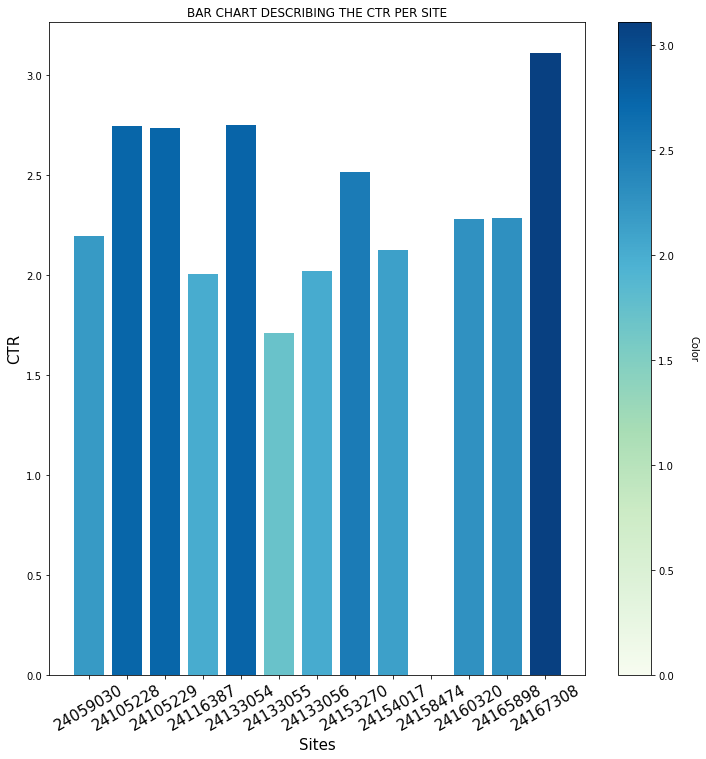

In [46]:

data_x = np.arange(len(DF_ad["ad_id"]))
data_hight = DF_ad['CTR']
data_color = DF_ad['CTR']

data_color = [x / max(DF_ad['CTR']) for x in DF_ad['CTR']]
fig, ax = plt.subplots(figsize=(12, 12))

my_cmap = plt.cm.get_cmap('GnBu')
colors = my_cmap(data_color)
rects = ax.bar(data_x, data_hight, color=colors)

sm = ScalarMappable(cmap=my_cmap, norm=plt.Normalize(0,max(data_hight)))
sm.set_array([])

cbar = plt.colorbar(sm)
cbar.set_label('Color', rotation=270,labelpad=25)


plt.xlabel('Sites', fontsize=15)
plt.ylabel('CTR', fontsize=15)
plt.xticks(data_x, DF_ad['ad_id'], fontsize=15, rotation=30)
plt.title('BAR CHART DESCRIBING THE CTR PER SITE')


plt.show()

In [47]:

DF_ad[DF_ad['CTR'] < 2]

,ad_id,CTR,Impression
5,24133055,1.709649,3451
9,24158474,0.000000,3081


Pour leboncoin Les deux annonces id 24133055 et 24158474 sont en dessou de la moyenne une des sollution est de etudier les specificités des autres annonces pour bouster le deux qui restent.

##Conclusion

Afin de booster le CTR, une des solution est de faire une étude similaire a celle effectuée pour leboncoin pour les sites qui restent afin d'augmenter le CTR par site ce qui nous conduira à augmenter le CTR Total.